    In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('nba_2013.csv')

In [3]:
data.head()

player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  ...  \
0     Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468  ...   
1   Steven Adams   C   20          OKC  81  20  1197   93   185  0.503  ...   
2    Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520  ...   
3  Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459  ...   
4  Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546  ...   

   drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  
0  144  216   28   23   26   30  122   171  2013-2014        2013  
1  190  332   43   40   57   71  203   265  2013-2014        2013  
2  204  306   38   24   36   39  108   362  2013-2014        2013  
3  230  262  248   35    3  146  136  1330  2013-2014        2013  
4  183  277   40   23   46   63  187   328  2013-2014        2013  

[5 rows x 31 columns]

In [4]:
data.shape

(481, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

## Column Meanings
- 'player' = name of the player
- 'pos' = the position of the player
- 'age' = player age on February 1 of the given season
- 'bref_team_id'
- 'g' = number of games the player was in
- 'gs' = number of games the player started
- 'mp' = Minutes Played
- 'fg' = field goals
- 'fga' = Field Goal Attempts (includes both 2-point field goal attempts and 3-point field goal attempts)
- 'fg.' = Field Goal Percentage; the formula is FG / FGA.
- 'x3p' = 3-Point Field Goals
- 'x3pa' = 3-Point Field Goal Attempts
- 'x3p.' = 3-Point Field Goal Percentage (available since the 1979-80 season in the NBA); the formula is 3P / 3PA.
- 'x2p' = 2-Point Field Goals
- 'x2pa' = 2-Point Field Goal Attempts
- 'x2p.' = 2-Point Field Goal Percentage; the formula is 2P / 2PA.
- 'efg.' = Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA.
- 'ft' = Free Throws
- 'fta' = Free Throw Attempts
- 'ft.' = Free Throw Percentage; the formula is FT / FTA.
- 'orb' = Offensive Rebounds
- 'drb' = Defensive Rebounds
- 'trb' = Total Rebounds
- 'ast' = assists
- 'stl' = steals
- 'blk' = blocks
- 'tov' = Turnovers
- 'pf' =  Personal Fouls
- 'pts' = total points the player scored
- 'season' = 
- 'season_end' = 

In [6]:
data.describe()

age           g          gs           mp          fg  \
count  481.000000  481.000000  481.000000   481.000000  481.000000   
mean    26.509356   53.253638   25.571726  1237.386694  192.881497   
std      4.198265   25.322711   29.658465   897.258840  171.832793   
min     19.000000    1.000000    0.000000     1.000000    0.000000   
25%     23.000000   32.000000    0.000000   388.000000   47.000000   
50%     26.000000   61.000000   10.000000  1141.000000  146.000000   
75%     29.000000   76.000000   54.000000  2016.000000  307.000000   
max     39.000000   83.000000   82.000000  3122.000000  849.000000   

               fga         fg.         x3p        x3pa        x3p.  ...  \
count   481.000000  479.000000  481.000000  481.000000  414.000000  ...   
mean    424.463617    0.436436   39.613306  110.130977    0.285111  ...   
std     368.850833    0.098672   50.855639  132.751732    0.157633  ...   
min       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%     110.000000    0.400500    0.000000    3.000000    0.234355  ...   
50%     332.000000    0.438000   16.000000   48.000000    0.330976  ...   
75%     672.000000    0.479500   68.000000  193.000000    0.375000  ...   
max    1688.000000    1.000000  261.000000  615.000000    1.000000  ...   

              orb         drb          trb         ast         stl  \
count  481.000000  481.000000   481.000000  481.000000  481.000000   
mean    55.810811  162.817048   218.627859  112.536383   39.280665   
std     62.101191  145.348116   200.356507  131.019557   34.783590   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%     12.000000   43.000000    55.000000   20.000000    9.000000   
50%     35.000000  135.000000   168.000000   65.000000   32.000000   
75%     73.000000  230.000000   310.000000  152.000000   60.000000   
max    440.000000  783.000000  1114.000000  721.000000  191.000000   

              blk         tov          pf          pts  season_end  
count  481.000000  481.000000  481.000000   481.000000       481.0  
mean    24.103950   71.862786  105.869023   516.582121      2013.0  
std     30.875381   62.701690   71.213627   470.422228         0.0  
min      0.000000    0.000000    0.000000     0.000000      2013.0  
25%      4.000000   21.000000   44.000000   115.000000      2013.0  
50%     14.000000   58.000000  104.000000   401.000000      2013.0  
75%     32.000000  108.000000  158.000000   821.000000      2013.0  
max    219.000000  295.000000  273.000000  2593.000000      2013.0  

[8 rows x 27 columns]

In [7]:
for col in data.select_dtypes(object):
    print(col, ':-')
    print(data[col].value_counts())
    print('='*50, '\n')

player :-
Jason Thompson      1
Jae Crowder         1
Melvin Ely          1
Jason Terry         1
Anthony Davis       1
                   ..
Meyers Leonard      1
Boris Diaw          1
Arinze Onuaku       1
Shabazz Muhammad    1
Nikola Pekovic      1
Name: player, Length: 481, dtype: int64

pos :-
SG    109
SF     99
PF     96
C      90
PG     85
F       1
G       1
Name: pos, dtype: int64

bref_team_id :-
TOT    63
NOP    18
OKC    17
UTA    16
LAC    16
LAL    16
DET    15
BRK    15
DAL    15
PHO    15
ATL    15
POR    15
NYK    15
MIA    15
HOU    15
SAS    14
WAS    14
CLE    14
MIN    14
BOS    14
CHA    13
MEM    13
ORL    13
MIL    13
GSW    12
DEN    12
PHI    12
IND    12
CHI    11
TOR    10
SAC     9
Name: bref_team_id, dtype: int64

season :-
2013-2014    481
Name: season, dtype: int64



In [8]:
#

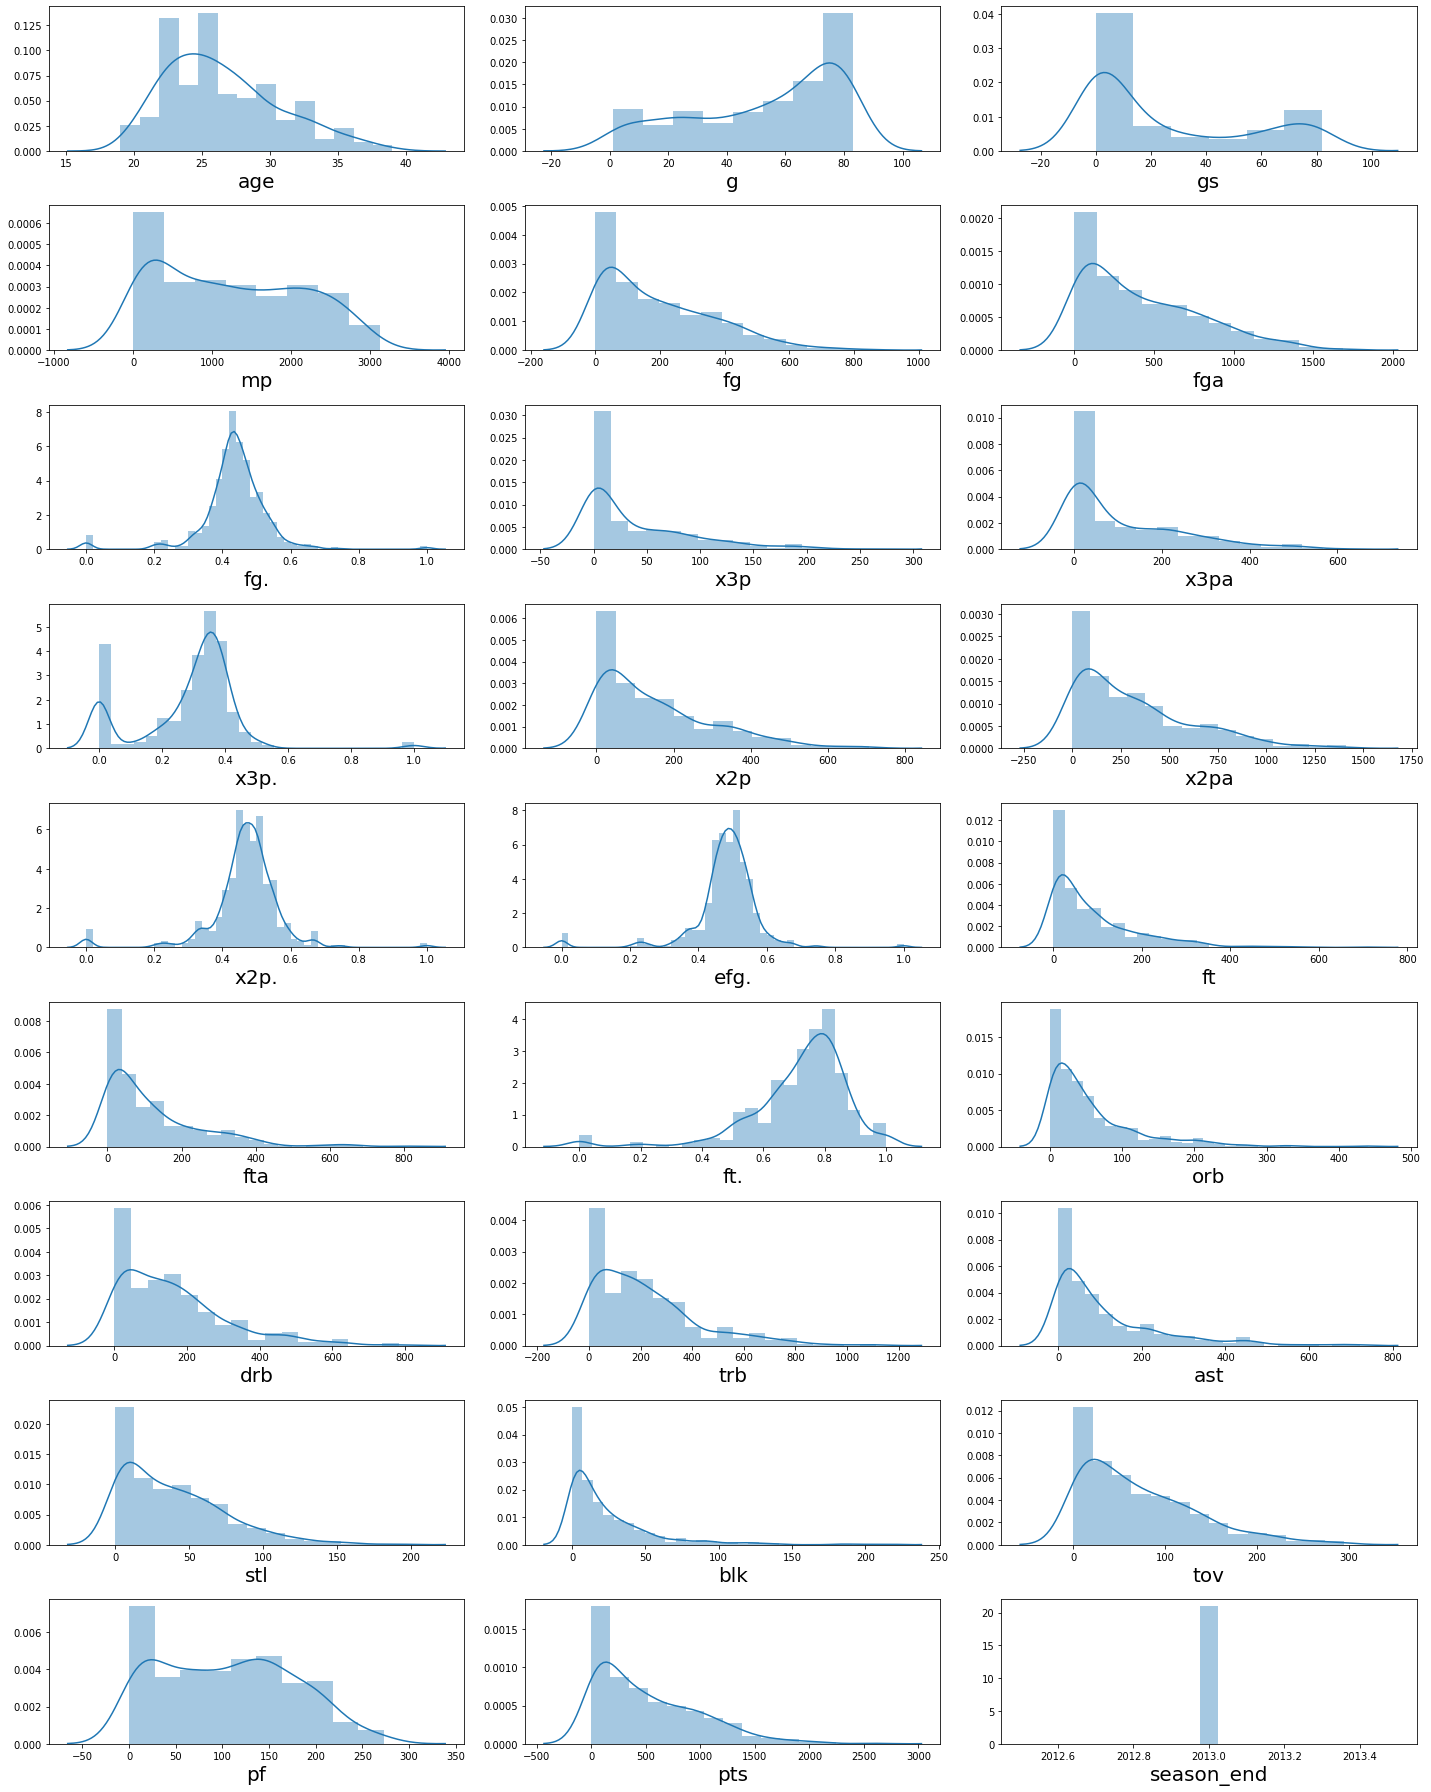

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.select_dtypes(exclude=object):
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

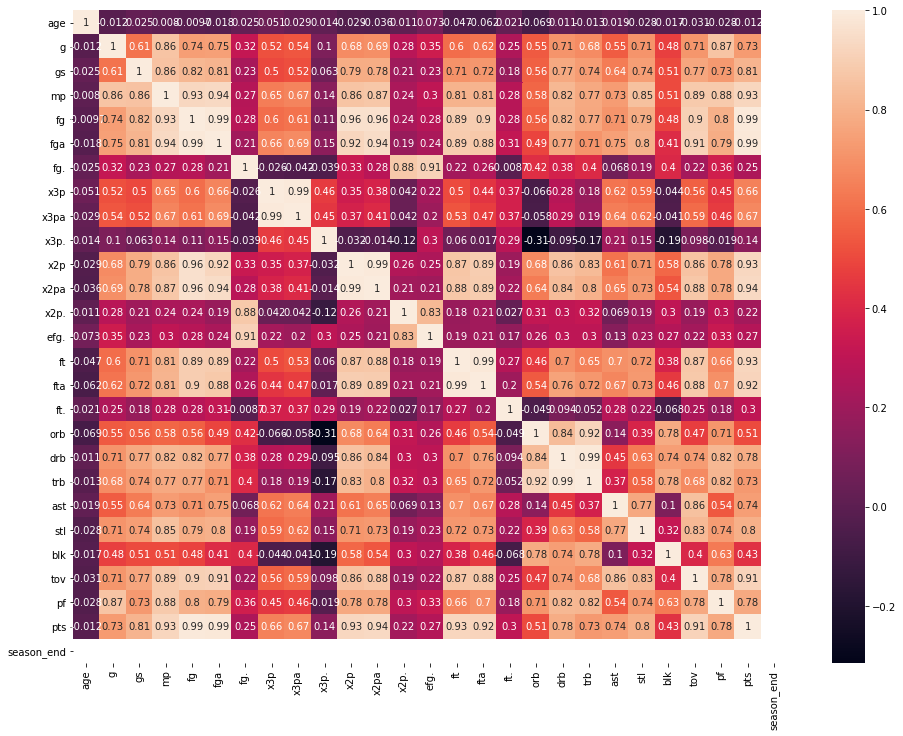

In [10]:
plt.figure(figsize=(16,12))
sns.heatmap(data.select_dtypes(exclude=object).corr(), annot=True)
plt.show()

<Figure size 1440x1152 with 0 Axes>

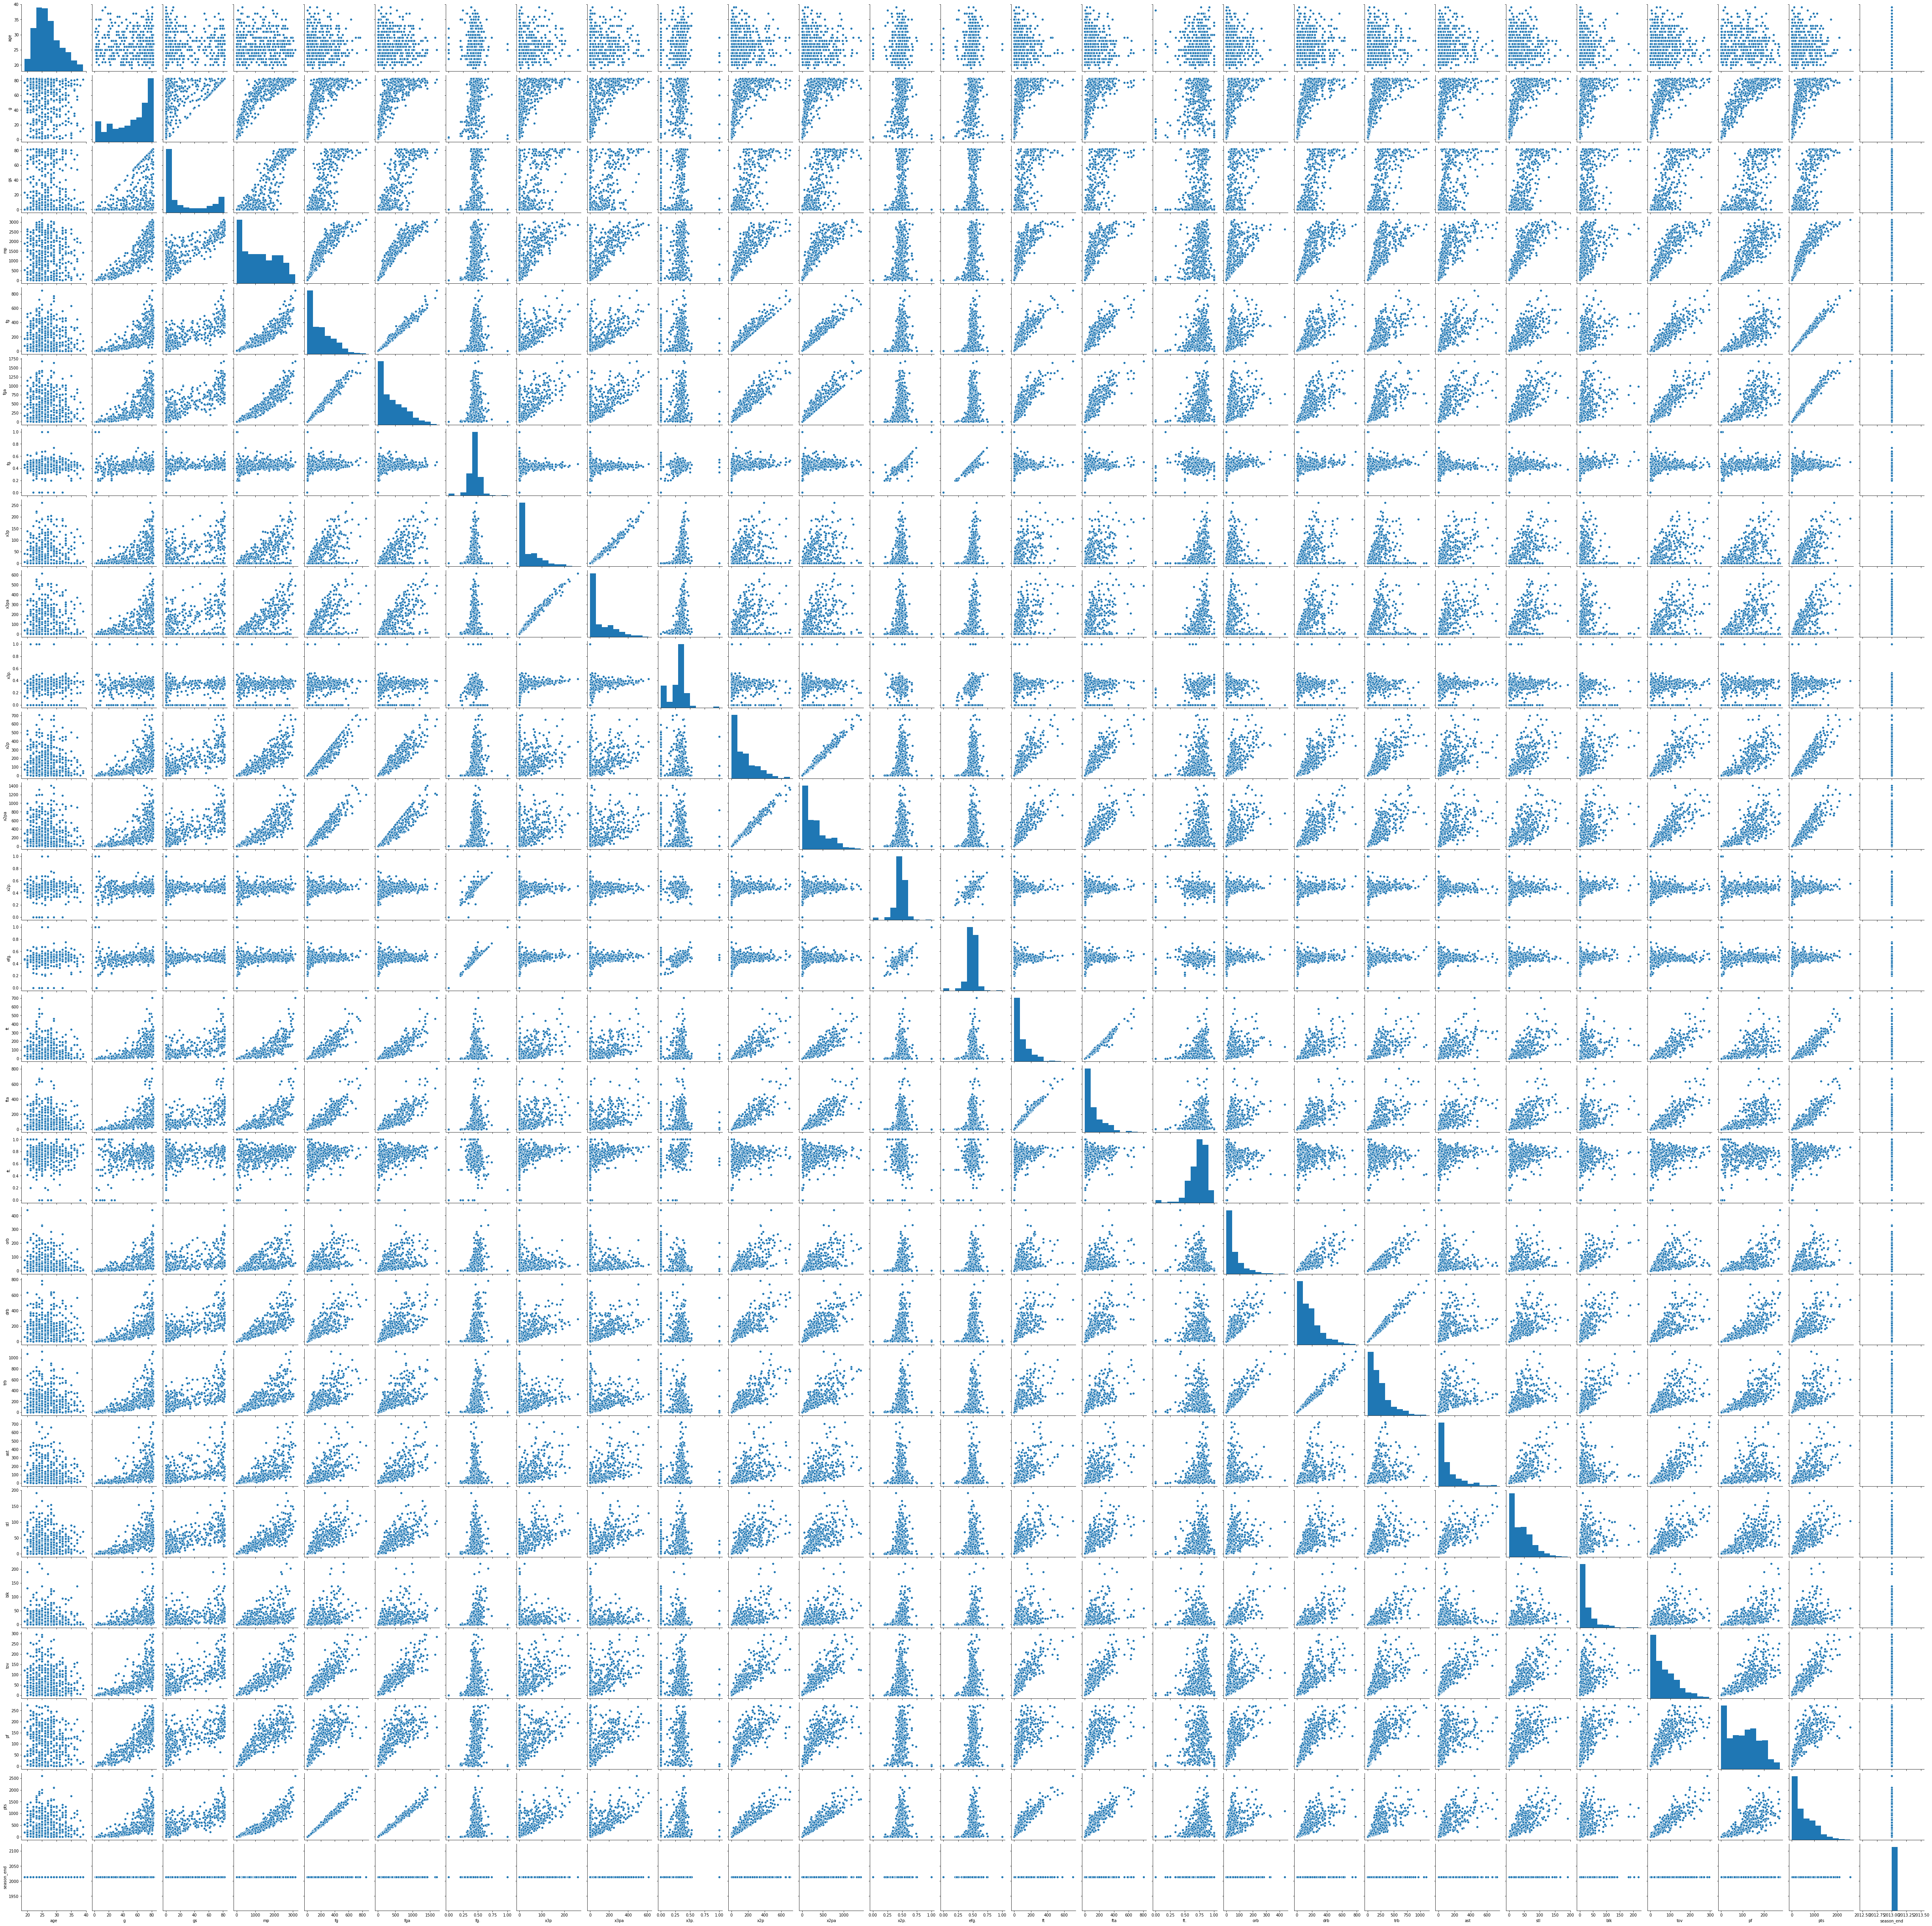

In [11]:
plt.figure(figsize=(20,16))
sns.pairplot(data)
plt.show()

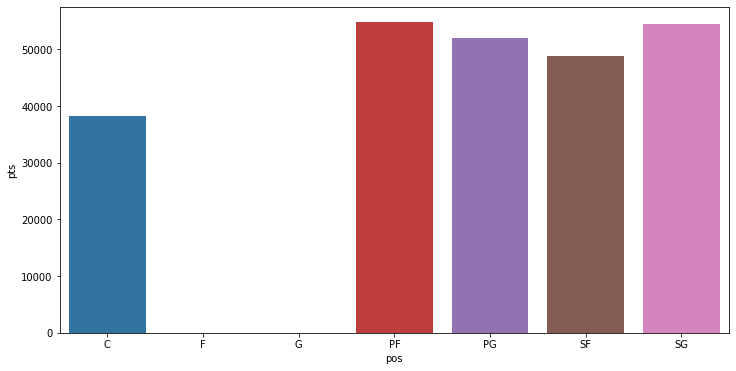

In [12]:
# Position-wise points

plt.figure(figsize=(12,6))
sns.barplot(x=data.groupby('pos')['pts'].agg('sum').index, y=data.groupby('pos')['pts'].agg('sum'))
plt.show()

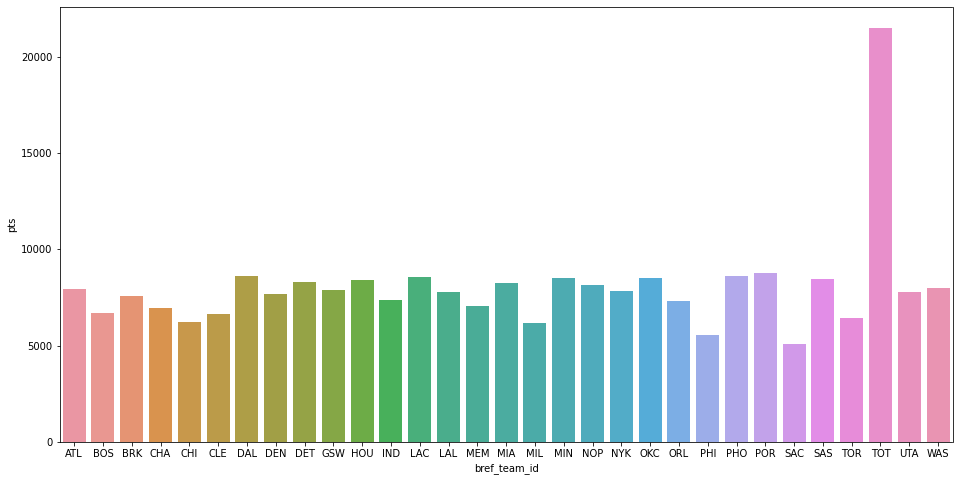

In [13]:
# Team-wise points

plt.figure(figsize=(16,8))
sns.barplot(x=data.groupby('bref_team_id')['pts'].agg('sum').index, y=data.groupby('bref_team_id')['pts'].agg('sum'))
plt.show()

In [14]:
data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [15]:
# Columns to drop
drop_cols = ['player', 'season', 'season_end']
data.drop(drop_cols, axis=1, inplace=True)
data.shape

(481, 28)

In [16]:
# Checcking Null Values
data.isnull().sum()

pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
dtype: int64

In [17]:
# Filling Null values with mean as all the percentage columns are nearnly normally distributed
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)

In [18]:
data.isnull().sum()

pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
dtype: int64

In [19]:
# Label Encoding Positions and Team IDs
from sklearn.preprocessing import LabelEncoder
le_pos = LabelEncoder()
le_teamid = LabelEncoder()

data['pos'] = le_pos.fit_transform(data['pos'])
data['bref_team_id'] = le_teamid.fit_transform(data['bref_team_id'])

In [20]:
data[['pos', 'bref_team_id']]

pos  bref_team_id
0      5            28
1      0            20
2      3            28
3      6            21
4      0            18
..   ...           ...
476    6            22
477    6            13
478    3            22
479    0             3
480    0             5

[481 rows x 2 columns]

In [21]:
# Features and Target
X = data.drop('pts', axis=1)
y = data['pts']
print(X.shape)
print(y.shape)

(481, 27)
(481,)


In [22]:
# Scaling Values
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [23]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif

Features        VIF
0            pos   2.149135
1            age   1.134210
2   bref_team_id   1.044872
3              g   7.990252
4             gs   6.202375
5             mp  46.189186
6             fg        inf
7            fga        inf
8            fg.  23.367023
9            x3p        inf
10          x3pa        inf
11          x3p.   1.923105
12           x2p        inf
13          x2pa        inf
14          x2p.   6.175910
15          efg.  17.540187
16            ft  81.640963
17           fta  89.465170
18           ft.   1.506785
19           orb        inf
20           drb        inf
21           trb        inf
22           ast   7.590945
23           stl   5.098939
24           blk   3.374835
25           tov  17.897242
26            pf  10.123305

In [24]:
vif[vif['VIF'] < 10]

Features       VIF
0            pos  2.149135
1            age  1.134210
2   bref_team_id  1.044872
3              g  7.990252
4             gs  6.202375
11          x3p.  1.923105
14          x2p.  6.175910
18           ft.  1.506785
22           ast  7.590945
23           stl  5.098939
24           blk  3.374835

In [25]:
select_cols = vif.loc[vif['VIF'] < 10, 'Features'].values.tolist()
select_cols

['pos',
 'age',
 'bref_team_id',
 'g',
 'gs',
 'x3p.',
 'x2p.',
 'ft.',
 'ast',
 'stl',
 'blk']

In [26]:
# Selecting only the columns with VIF < 10
X_new = data[select_cols]

# Scaling
sc2 = StandardScaler()
X_sc = sc2.fit_transform(X_new)

In [27]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size= 0.2, random_state=111)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(384, 11)
(97, 11)
(384,)
(97,)


# kNN Model

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
#fit to training set
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [30]:
# R2 for trianing set
knn.score(X_train, y_train)

0.8448546985450176

In [31]:
y_pred = knn.predict(X_test)

In [32]:
# R2 for trianing set
knn.score(X_test, y_test)

0.7684330367943348

In [33]:
from sklearn.metrics import r2_score

# Adjusted R-squred
N = len(y_test)
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ((1-r2)*(N-1)/ (N-p-1))
adj_r2

0.7384655474383075

In [34]:
r2

0.7684330367943348

## Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'weights' : ['uniform', 'distance'],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [15,20,25,30,35,40],
              'n_neighbors' : [5,7,10,12,15,20],
              'p' : [1,2,3]}

In [37]:
knn_gridsearch = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, n_jobs=-1, 
                              verbose=1, return_train_score=True)
knn_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 3204 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   24.5s finished


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 20, 25, 30, 35, 40],
                         'n_neighbors': [5, 7, 10, 12, 15, 20], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, verbose=1)

In [38]:
knn_gridsearch.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=15, n_neighbors=20, p=1,
                    weights='distance')

In [39]:
knn_gridsearch.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 15,
 'n_neighbors': 20,
 'p': 1,
 'weights': 'distance'}

In [40]:
knn_gridsearch.best_score_

0.8196201248211139

In [41]:
knn_best = KNeighborsRegressor(algorithm='ball_tree', leaf_size=15, 
                               n_neighbors=20, p=1, weights='distance')

knn_best.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=15, n_neighbors=20, p=1,
                    weights='distance')

In [42]:
knn_best.score(X_train, y_train)

1.0

In [43]:
knn_best.score(X_test, y_test)

0.7739176411210436

In [44]:
y_pred_grid = knn_best.predict(X_test)

In [45]:
# Adjusted R-squred
N = len(y_test)
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred_grid)
adj_r2 = 1 - ((1-r2)*(N-1)/ (N-p-1))
adj_r2

0.7446599240896492

In [46]:
r2

0.7739176411210436

## Here, we can see that the best model from gridsearch is completely over-fitting.
## Lets try to reduce the n_neighbors and rerun

In [47]:
param_grid = {'weights' : ['uniform', 'distance'],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [15,20,25,30,35],
              'n_neighbors' : [3,5,7,10,12,15],
              'p' : [1,2,3]}

In [48]:
knn_gridsearch = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, n_jobs=-1, 
                              verbose=1, return_train_score=True)
knn_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 2650 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   17.1s finished


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 20, 25, 30, 35],
                         'n_neighbors': [3, 5, 7, 10, 12, 15], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, verbose=1)

In [49]:
knn_gridsearch.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=15, n_neighbors=12, p=1)

In [50]:
knn_gridsearch.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 15,
 'n_neighbors': 12,
 'p': 1,
 'weights': 'uniform'}

In [51]:
knn_gridsearch.best_score_

0.8176734297142054

In [52]:
knn_best = KNeighborsRegressor(algorithm='ball_tree', leaf_size=15, n_neighbors=12, p=1)

knn_best.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=15, n_neighbors=12, p=1)

In [53]:
knn_best.score(X_train, y_train)

0.8383417420359887

In [54]:
knn_best.score(X_test, y_test)

0.799935701404087

In [55]:
y_pred_grid = knn_best.predict(X_test)

In [56]:
# Adjusted R-squred
N = len(y_test)
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred_grid)
adj_r2 = 1 - ((1-r2)*(N-1)/ (N-p-1))
adj_r2

0.7740450274681453

In [57]:
r2

0.799935701404087

## The model has slightly less R2 score than base model but test set score has improved